In [3]:
#하이퍼파라미터(데이터 유사도 종류, 군집간 거리 산출방법)에 따른 군집상태 관찰

import torch
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd

import numpy as np
from sklearn.datasets import load_boston
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
# import tensorflow as tf
import re
#기계학습 모델 및 평가
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
#한글 폰트 설정
plt.rc('font',family ='Malgun Gothic')



In [4]:

#Blobs ==> :make_blobs
from sklearn.datasets import make_blobs #등방성 가우시안 정규분포를 이용해 가상 데이터를 생성

In [5]:
blobs_x,blobs_y=make_blobs(n_samples=5000,centers=5,shuffle=True,random_state=10)

In [6]:
print('blobs_x data shape:',blobs_x.shape)
print('blobs_y data shape:',blobs_y.shape)

blobs_x data shape: (5000, 2)
blobs_y data shape: (5000,)


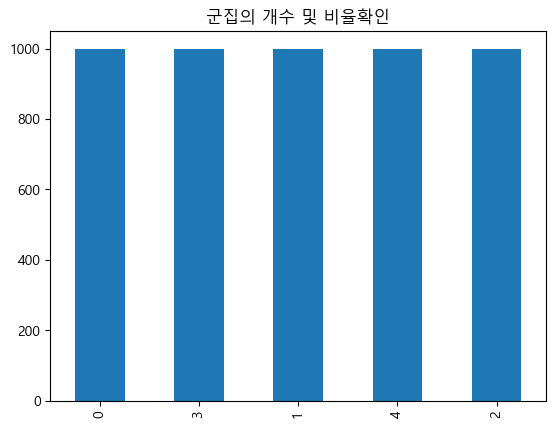

In [7]:
pd.value_counts(blobs_y).plot(kind='bar',title='군집의 개수 및 비율확인')
plt.show()

In [8]:
np.unique(blobs_y)

array([0, 1, 2, 3, 4])

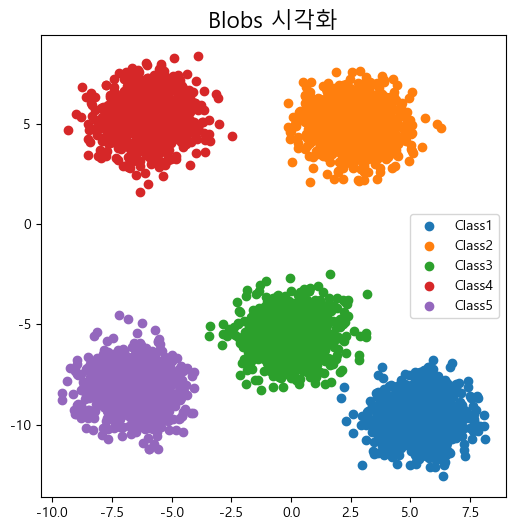

In [9]:
plt.figure(figsize=(6,6))
plt.title('Blobs 시각화',fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0],blobs_x[blobs_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

In [10]:
from sklearn.datasets import make_moons


In [11]:
moons_x,moons_y = make_moons(n_samples=5000,noise=0.05,shuffle=True,random_state=0)

In [12]:
print('blobs_x data shape:',moons_x.shape)
print('blobs_y data shape:',moons_y.shape)

blobs_x data shape: (5000, 2)
blobs_y data shape: (5000,)


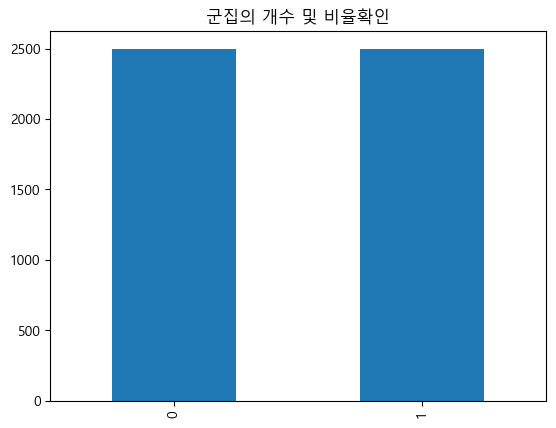

In [13]:
pd.value_counts(moons_y).plot(kind='bar',title='군집의 개수 및 비율확인')
plt.show()

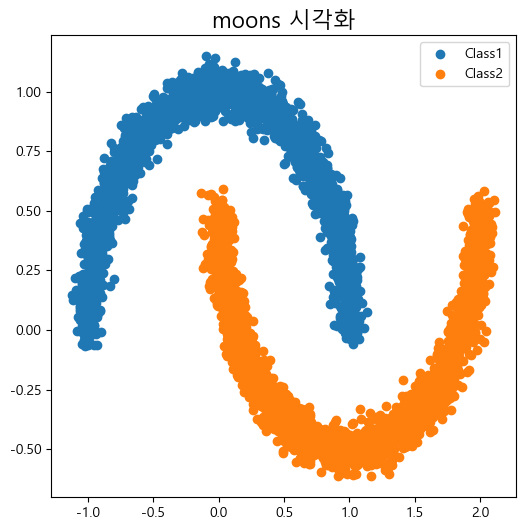

In [14]:
plt.figure(figsize=(6,6))
plt.title('moons 시각화',fontsize=16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0],moons_x[moons_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

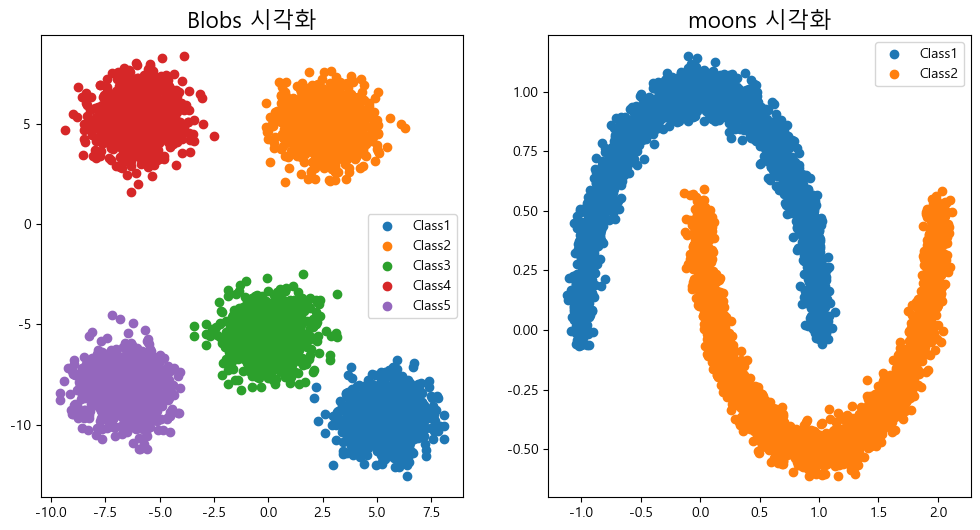

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Blobs 시각화',fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0],blobs_x[blobs_y==c,1],label ='Class{}'.format(c+1))
plt.legend()


plt.subplot(1,2,2)
plt.title('moons 시각화',fontsize=16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0],moons_x[moons_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering #병합 군집


In [17]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete', #최대거리가 가장 짧은 두 클러스터를 합침
    affinity = 'euclidean',
    distance_threshold=5,
    n_clusters= None
)
# 학습
blobs_clusters = model.fit_predict(blobs_x)

In [18]:
blobs_clusters.max()

16

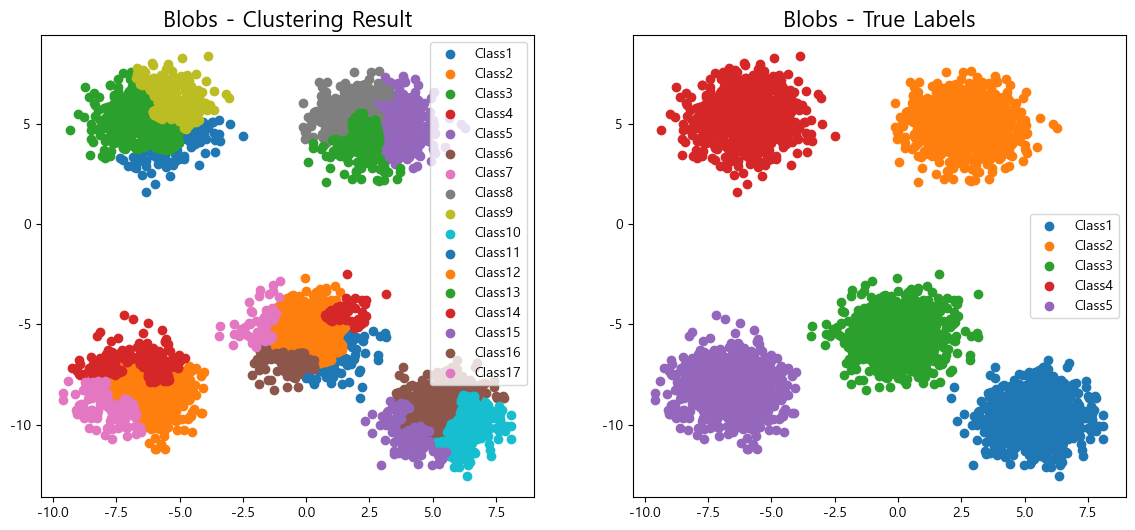

In [19]:
plt.figure(figsize=(14,6)) # 그림크기
plt.subplot(1,2,1)
plt.title('Blobs - Clustering Result',fontsize=16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c,0],blobs_x[blobs_clusters==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.subplot(1,2,2)
plt.title('Blobs - True Labels',fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0],blobs_x[blobs_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

In [20]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete', #최대거리가 가장 짧은 두 클러스터를 합침
    affinity = 'euclidean',
    distance_threshold=10,
    n_clusters= None
)
# 학습
blobs_clusters2 = model.fit_predict(blobs_x)
blobs_clusters2.max()

4

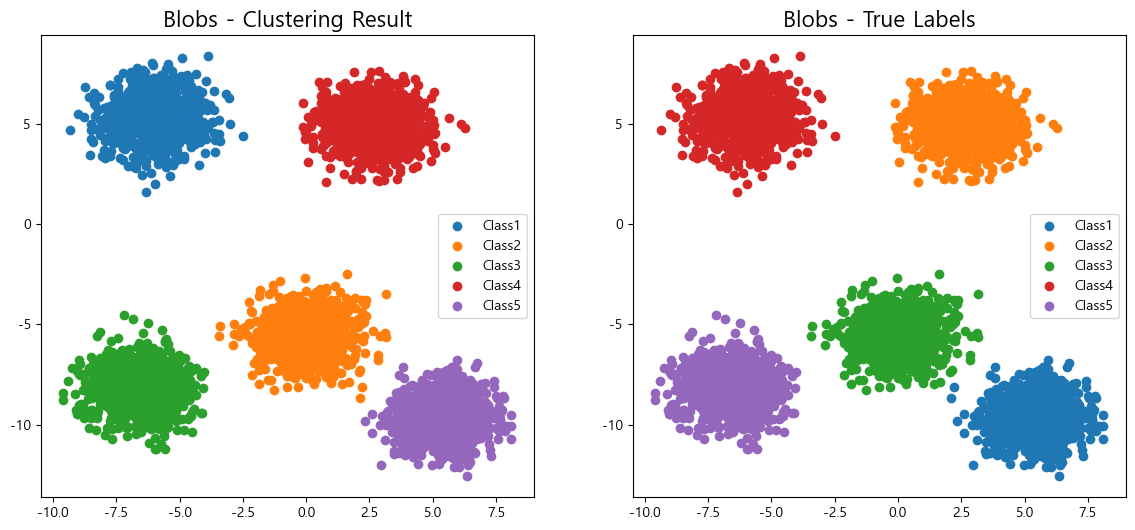

In [21]:
plt.figure(figsize=(14,6)) # 그림크기
plt.subplot(1,2,1)
plt.title('Blobs - Clustering Result',fontsize=16)
for c in np.unique(blobs_clusters2):
    plt.scatter(blobs_x[blobs_clusters2 == c,0],blobs_x[blobs_clusters2==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.subplot(1,2,2)
plt.title('Blobs - True Labels',fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0],blobs_x[blobs_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

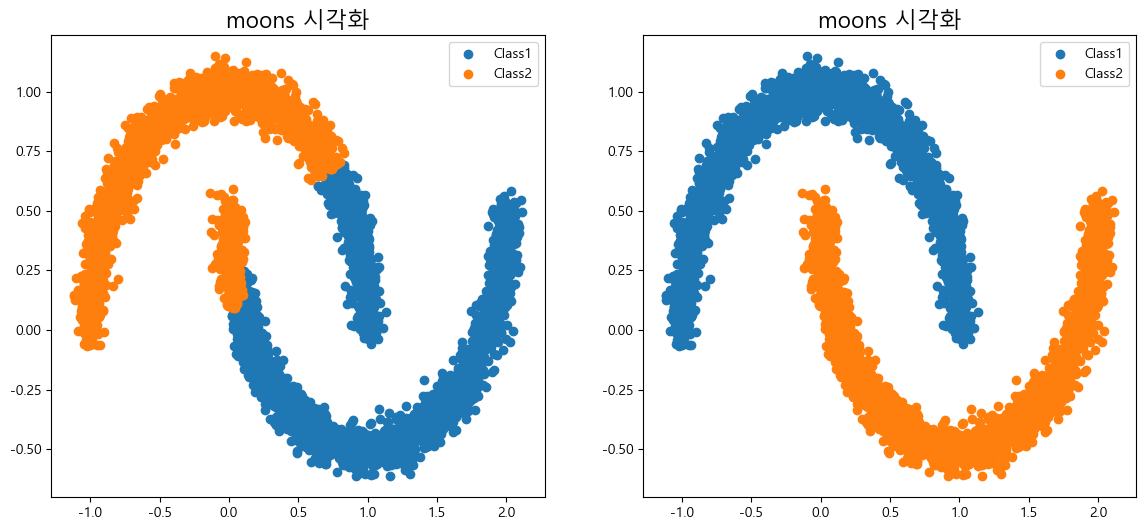

In [22]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete', #최대거리가 가장 짧은 두 클러스터를 합침
    affinity = 'euclidean',
    distance_threshold=2.8,
    n_clusters= None
)
# 학습
blobs_clusters3 = model.fit_predict(moons_x)
blobs_clusters3.max()
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('moons 시각화',fontsize=16)
for c in np.unique(blobs_clusters3):
    plt.scatter(moons_x[blobs_clusters3 == c,0],moons_x[blobs_clusters3==c,1],label ='Class{}'.format(c+1))
plt.legend()

plt.subplot(1,2,2)
plt.title('moons 시각화',fontsize=16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0],moons_x[moons_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

In [23]:
# Linkage 변경하면서 학습

In [24]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete', #최대거리가 가장 짧은 두 클러스터를 합침
    affinity = 'euclidean',
    distance_threshold=1,
    n_clusters= None
)
cluster_results = {}
linkage_list = ['single', 'complete', 'average', 'ward']
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x) # 학습
    cluster_results[_linkage] = _results

cluster_results

{'single': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'complete': array([2, 5, 7, ..., 0, 8, 8], dtype=int64),
 'average': array([1, 0, 2, ..., 3, 0, 0], dtype=int64),
 'ward': array([30, 40, 17, ...,  9, 19, 32], dtype=int64)}

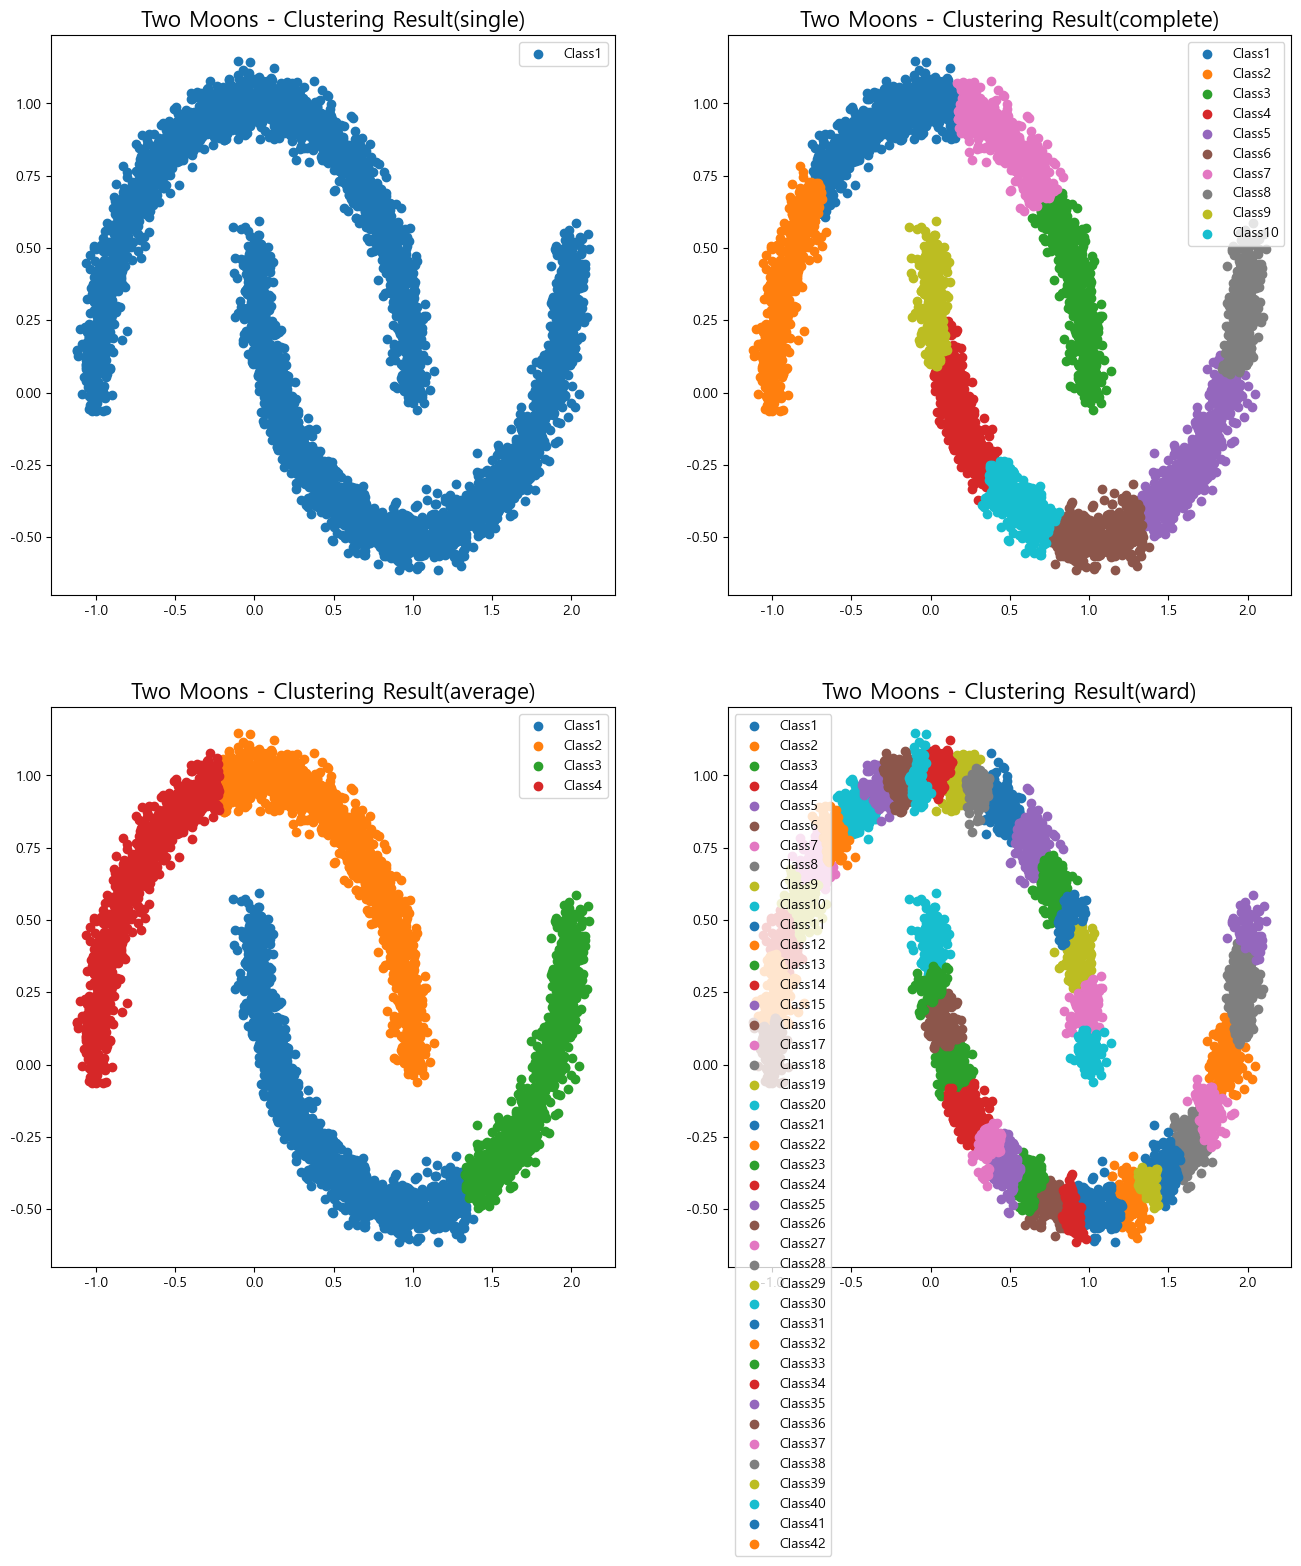

In [25]:
#시각화
plt.figure(figsize=(16,16))
for i, _linkage in enumerate(linkage_list):
	plt.subplot(2,2,i+1)
	plt.title('Two Moons - Clustering Result({})'.format(_linkage),fontsize=16)
	_results = cluster_results[_linkage]
	for c in np.unique(_results):
			plt.scatter(moons_x[_results == c,0],moons_x[_results==c,1],label ='Class{}'.format(c+1))
	plt.legend()
plt.show()

# plt.subplot(1,2,2)
# plt.title('moons 시각화',fontsize=16)
# for c in np.unique(moons_y):
#     plt.scatter(moons_x[moons_y == c,0],moons_x[moons_y==c,1],label ='Class{}'.format(c+1))
# plt.legend()
# plt.show()

In [ ]:
# 2개의 군집으로 고정 후 linkage 변경

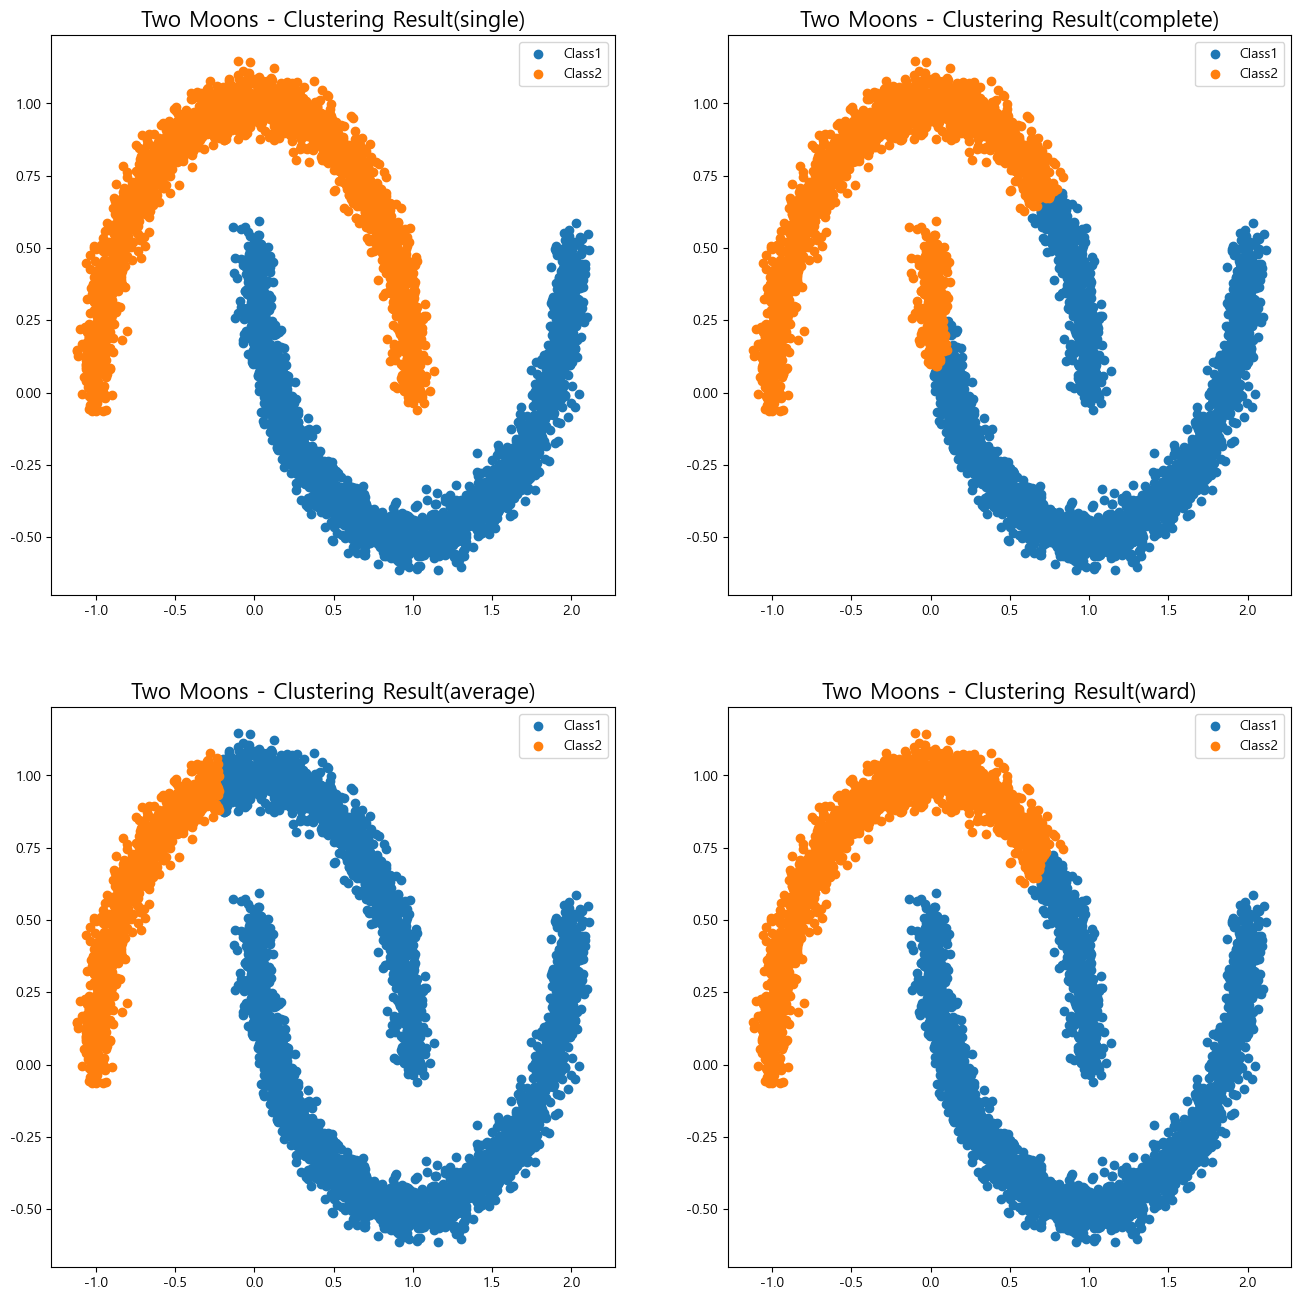

In [27]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete', #최대거리가 가장 짧은 두 클러스터를 합침
    affinity = 'euclidean',
    distance_threshold=None,
    n_clusters= 2  # 군집이 2개로 나오게 distance_threshold 이 설정됨.
)

cluster_results = {}
linkage_list = ['single', 'complete', 'average', 'ward']
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x) # 학습
    cluster_results[_linkage] = _results

#시각화
plt.figure(figsize=(16,16))
for i, _linkage in enumerate(linkage_list):
	plt.subplot(2,2,i+1)
	plt.title('Two Moons - Clustering Result({})'.format(_linkage),fontsize=16)
	_results = cluster_results[_linkage]
	for c in np.unique(_results):
			plt.scatter(moons_x[_results == c,0],moons_x[_results==c,1],label ='Class{}'.format(c+1))
	plt.legend()
plt.show()

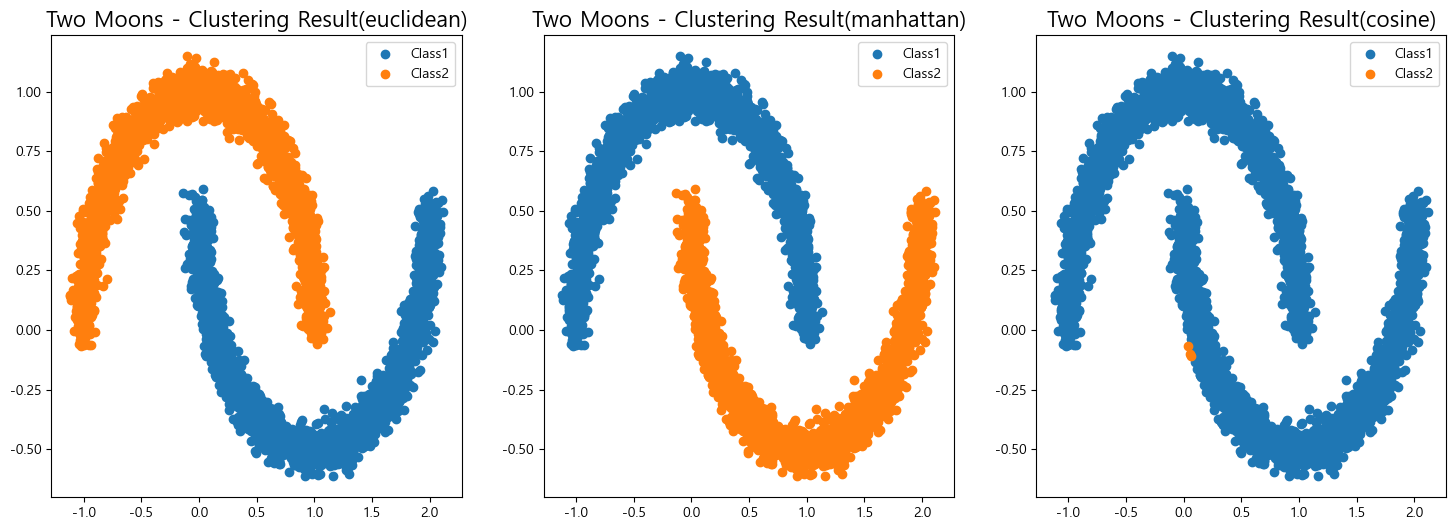

In [29]:
# 거리 종류 변경하기
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'single', 
    affinity = 'euclidean',
    distance_threshold=None,
    n_clusters= 2  # 군집이 2개로 나오게 distance_threshold 이 설정됨.
)

distance_list = ['euclidean', 'manhattan', 'cosine']

cluster_results = {}
for _distance in distance_list:
    model.affinity = _distance
    _results = model.fit_predict(moons_x) # 학습
    cluster_results[_distance] = _results

#시각화
plt.figure(figsize=(18,6))
for i, _distance in enumerate(distance_list):
	plt.subplot(1,3,i+1)
	plt.title('Two Moons - Clustering Result({})'.format(_distance),fontsize=16)
	_results = cluster_results[_distance]
	for c in np.unique(_results):
			plt.scatter(moons_x[_results == c,0],moons_x[_results==c,1],label ='Class{}'.format(c+1))
	plt.legend()
plt.show()



In [26]:
#K-MEANS Clustering 모델 정의
#KMeans 클러스터링 알고리즘은 n개의 중심점을 찎은 후에,
#이 중심점에서 각 점간의 거리의 합이 가장 최소화 되는 중심점 n의 위치를 찾고,
#이 중심점에서 가까운 점들을 중심점을 기준으로 묶는 클러스터링 알고리즘이다.

In [31]:
# 모델정의
model = KMeans(
    n_clusters= 5,
    init='random',
    n_init=1,
    random_state=0
)

# 학습
blobs_clusters = model.fit_predict(blobs_x)

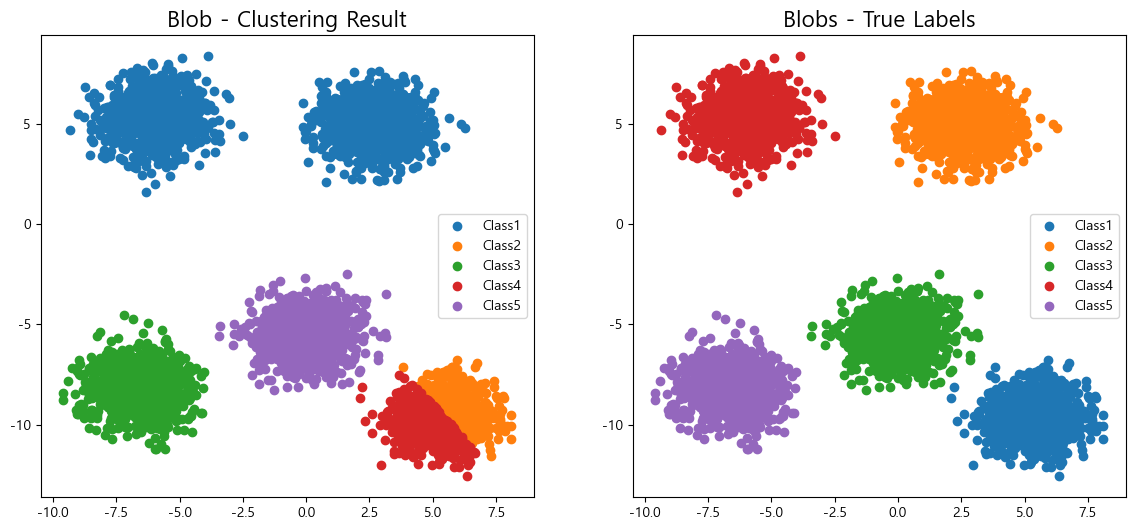

In [33]:
# 시각화
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Blob - Clustering Result', fontsize = 16)

for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c,0],blobs_x[blobs_clusters==c,1],label ='Class{}'.format(c+1))
plt.legend()


plt.subplot(1,2,2)
plt.title('Blobs - True Labels',fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0],blobs_x[blobs_y==c,1],label ='Class{}'.format(c+1))
plt.legend()
plt.show()

In [34]:
# Random state 변경하여 학습 확인

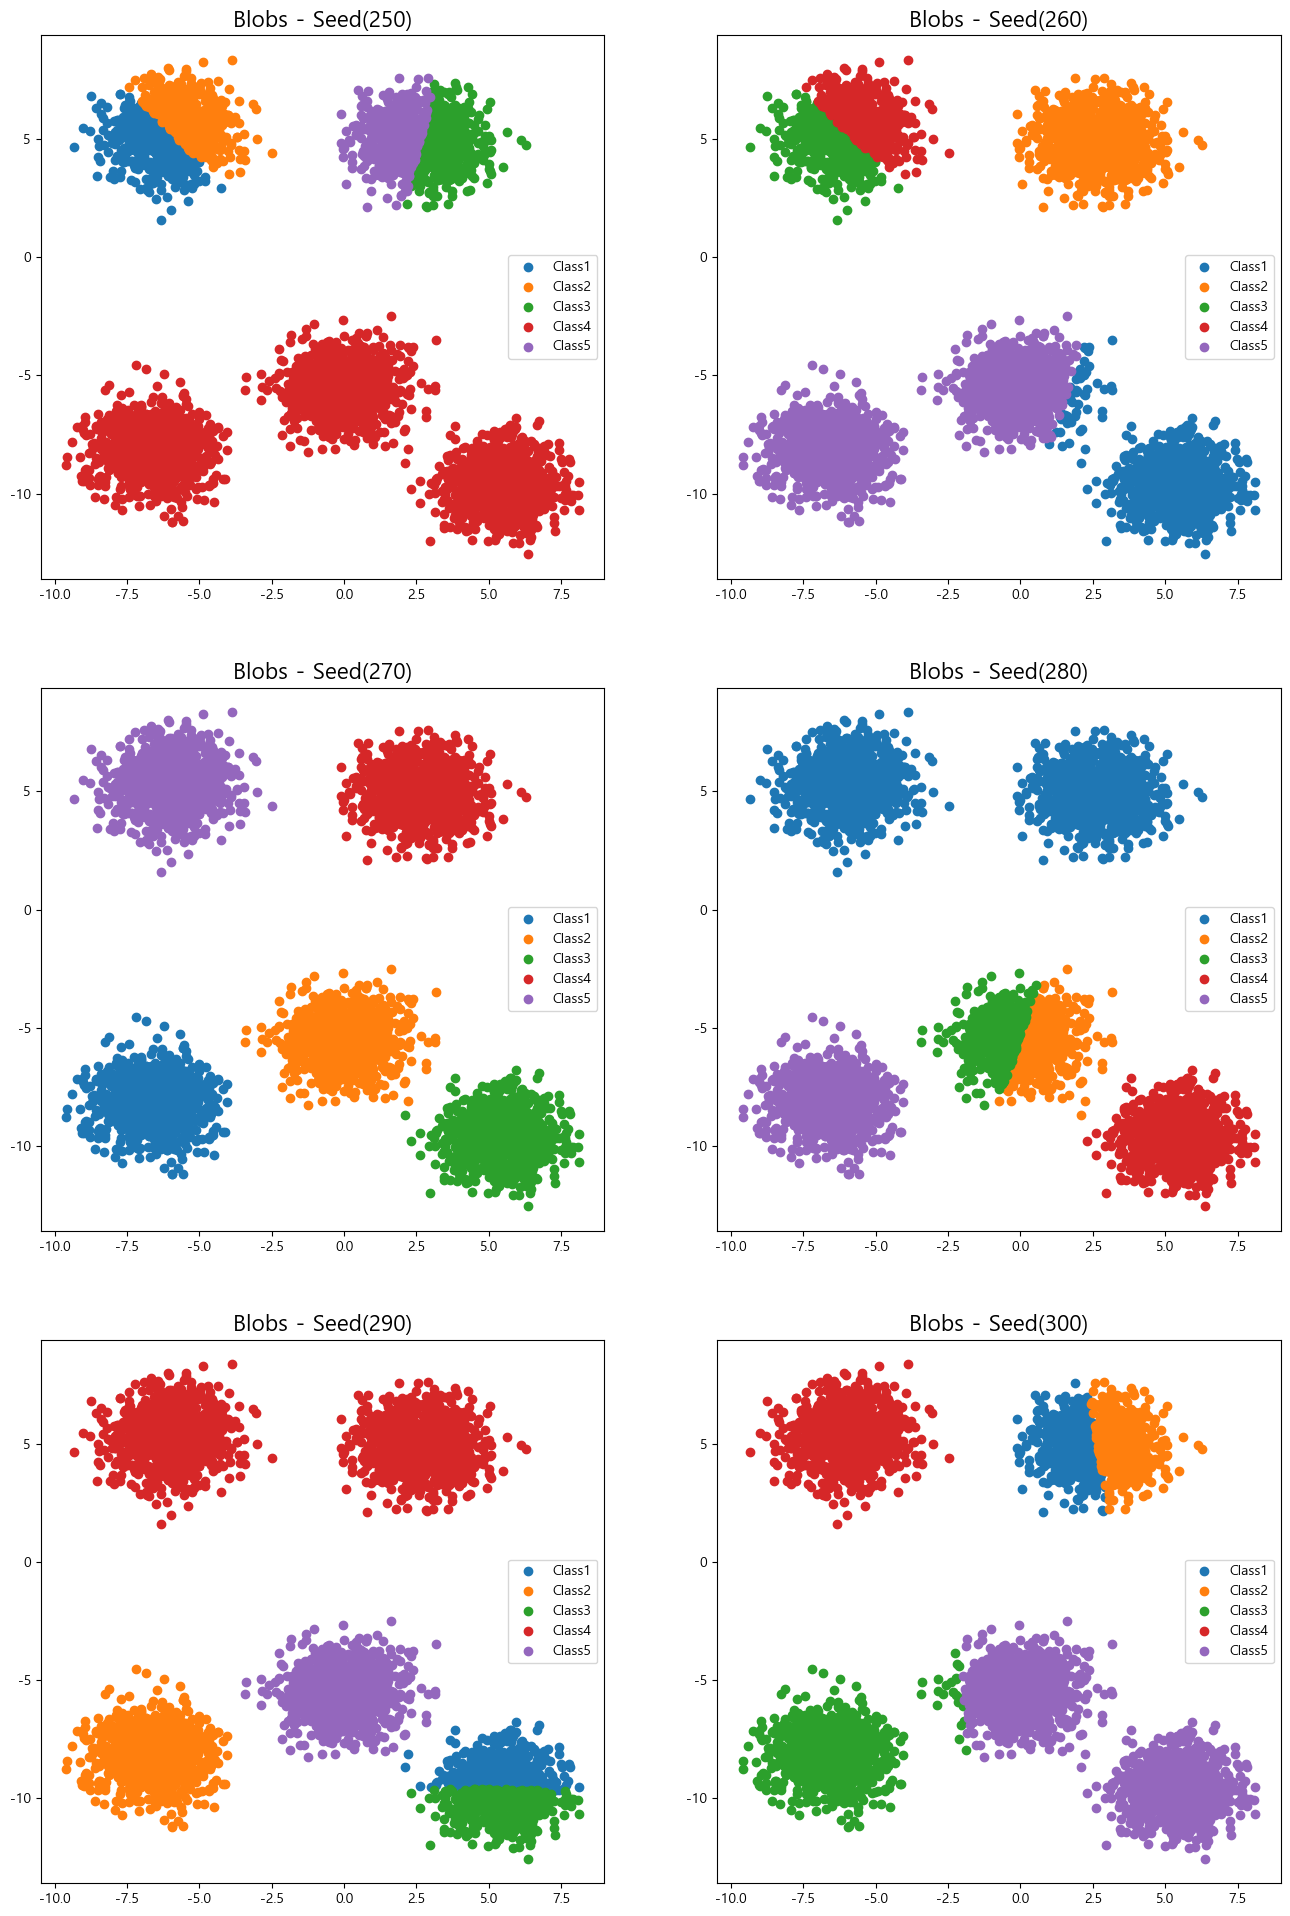

In [38]:
# 모델정의
model = KMeans(
    n_clusters= 5,
    init='random',
    n_init=1,
)
random_seeds = np.arange(250,310,10)
# random_seeds

cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x) # 학습
    cluster_results[_seed] = _results

#시각화
plt.figure(figsize=(16,24)) # 그림크기
for i, _seed in enumerate(random_seeds):
	plt.subplot(3,2,i+1)
	plt.title('Blobs - Seed({})'.format(_seed),fontsize=16)
	_results = cluster_results[_seed]
	for c in np.unique(_results):
			plt.scatter(blobs_x[_results == c,0],blobs_x[_results==c,1],label ='Class{}'.format(c+1))
	plt.legend()
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

In [ ]:
# 군집 개수 설정 ==> silhouette_score 이용

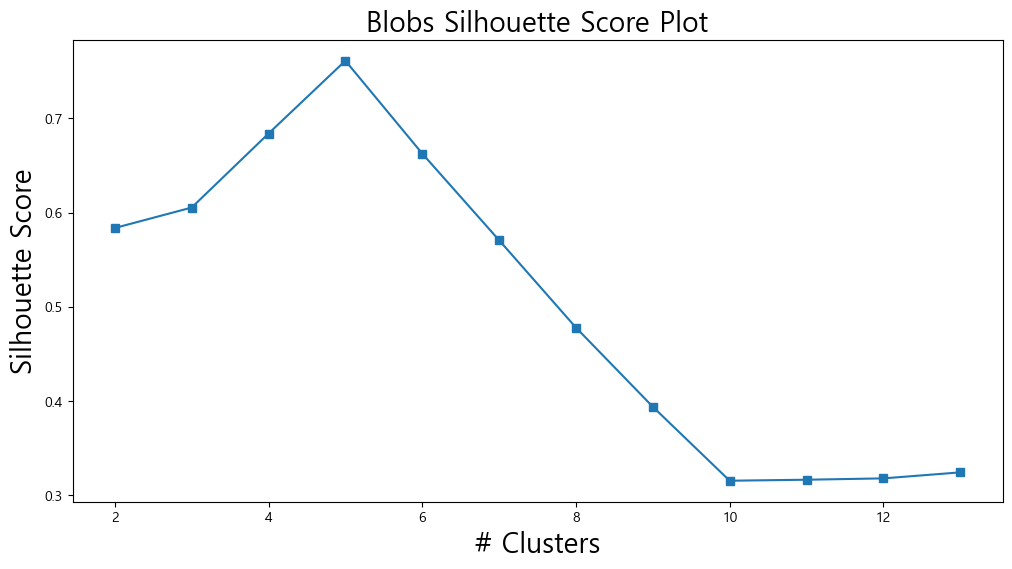

In [41]:
# 모델정의
model = KMeans(
    n_clusters= 2,
    init='k-means++', # 중심점을 전략적으로 정함
    n_init=10,        # n_init=10 : kmeans 알로리즘을 10번
    random_state=10
)

score = []
cluster_results = {}
for _n_clusters in np.arange(2,14):  # 2부터 13로 시도
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(blobs_x)
    score.append(silhouette_score(blobs_x, model.labels_)) # model.labels_ : 군집의 결과
# score

plt.figure(figsize=(12,6))
plt.title('Blobs Silhouette Score Plot', fontsize = 20)
plt.xlabel("# Clusters", fontsize = 20)
plt.ylabel("Silhouette Score", fontsize = 20)
plt.plot(np.arange(2,14),score, marker='s')
plt.show()
# 그림에서 y 값이 0.5보다 크면 군집이 잘 형성되어있다고 판단함

In [42]:
cluster_results.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

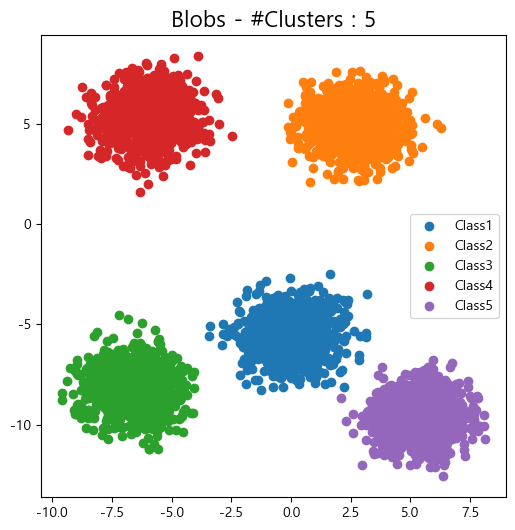

In [44]:
plt.figure(figsize=(6,6))
plt.title('Blobs - #Clusters : {}'.format(5), fontsize=16)
_results = cluster_results[5]

for c in np.unique(_results):
	plt.scatter(blobs_x[_results == c,0],blobs_x[_results==c,1],label ='Class{}'.format(c+1))
	plt.legend()
plt.show()

In [45]:
# K-평균 군집화  (Two Moons) ===> 실루엣 스코어 확인

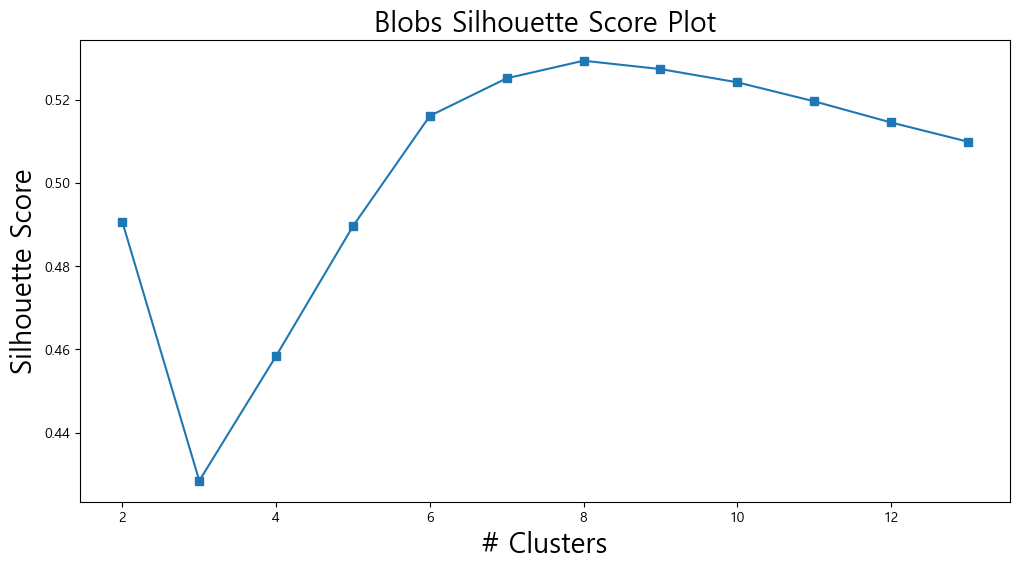

In [46]:
# 모델정의
model = KMeans(
    n_clusters= 2,
    init='k-means++', # 중심점을 전략적으로 정함
    n_init=10,        # n_init=10 : kmeans 알로리즘을 10번
    random_state=10
)

score = []
cluster_results = {}
for _n_clusters in np.arange(2,14):  # 2부터 13로 시도
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(moons_x)
    score.append(silhouette_score(moons_x, model.labels_)) # model.labels_ : 군집의 결과
# score

plt.figure(figsize=(12,6))
plt.title('Blobs Silhouette Score Plot', fontsize = 20)
plt.xlabel("# Clusters", fontsize = 20)
plt.ylabel("Silhouette Score", fontsize = 20)
plt.plot(np.arange(2,14),score, marker='s')
plt.show()
# 그림에서 y 값이 0.5보다 크면 군집이 잘 형성되어있다고 판단함


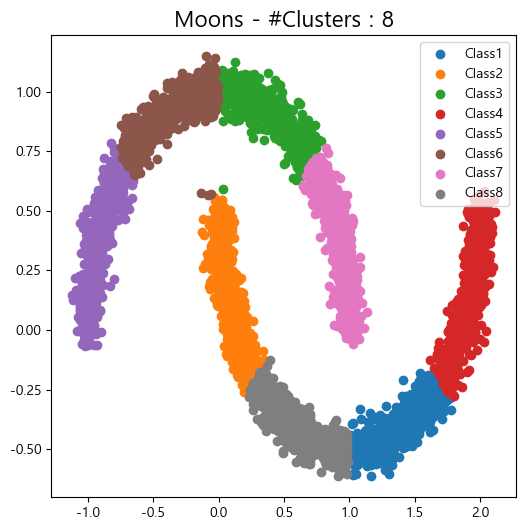

In [48]:
plt.figure(figsize=(6,6))
plt.title('Moons - #Clusters : {}'.format(8), fontsize=16)
_results = cluster_results[8]

for c in np.unique(_results):
	plt.scatter(moons_x[_results == c,0],moons_x[_results==c,1],label ='Class{}'.format(c+1))
	plt.legend()
plt.show()

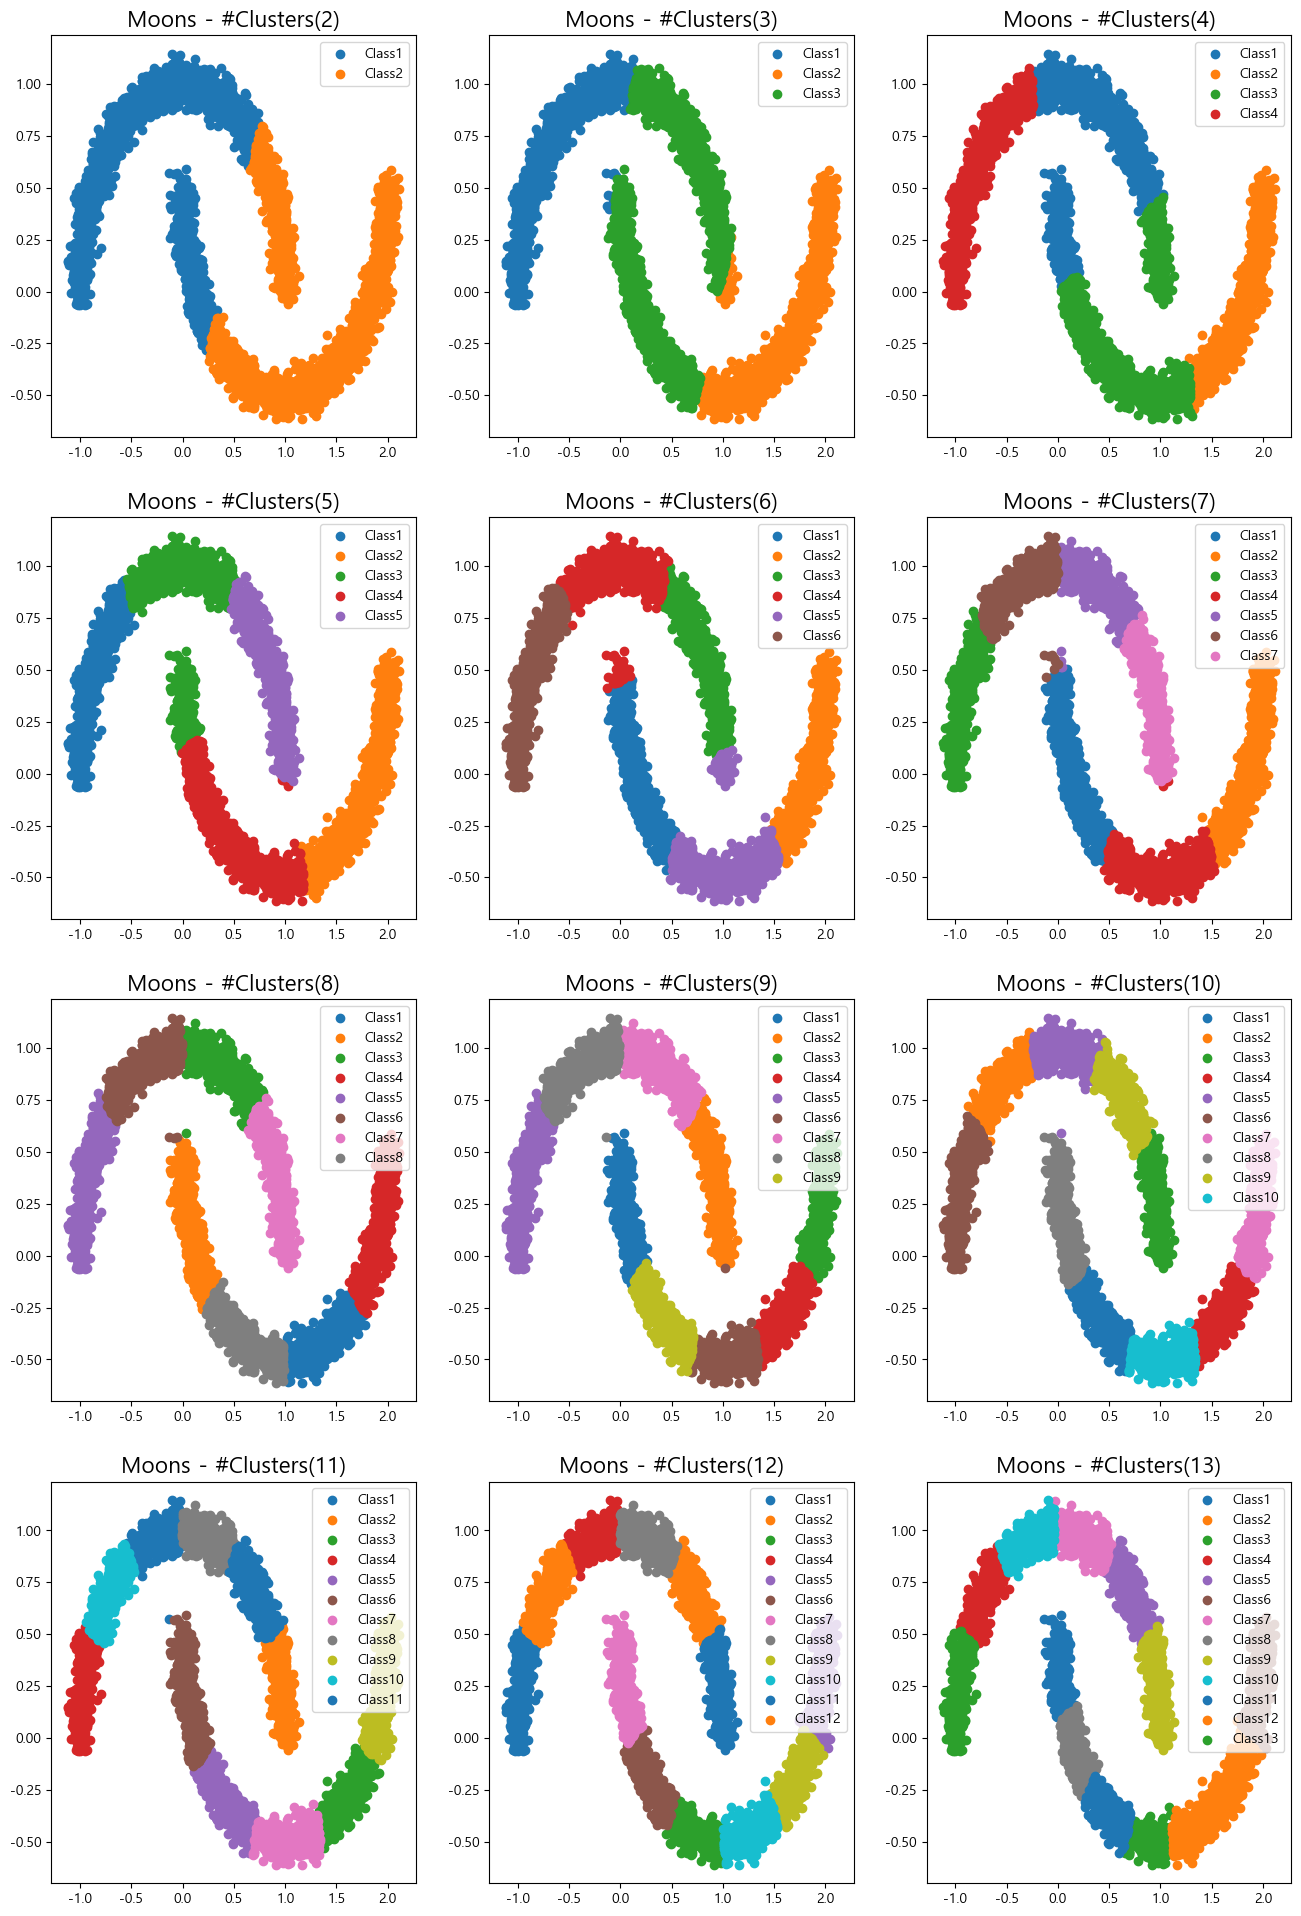

In [55]:
plt.figure(figsize=(16,24))
for i, _moons in enumerate(np.arange(2,14)):
	plt.subplot(4,3,i+1)
	plt.title('Moons - #Clusters({})'.format(_moons), fontsize=16)
	_results = cluster_results[_moons]
	for c in np.unique(_results):
		plt.scatter(moons_x[_results == c,0],moons_x[_results==c,1],label ='Class{}'.format(c+1))
		plt.legend()
plt.show()